<a href="https://colab.research.google.com/github/juma-paul/deep_learning/blob/main/LinearRegressionAsASingleNeuronNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:

def load_and_preprocess_data(file_path):
    # Load the insurance dataset
    df = pd.read_csv(file_path)

    # Convert categorical variables to numeric using one-hot encoding
    df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    # Separate features (X) and target variable (y)
    X = df.drop('charges', axis=1)
    y = df['charges']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
def create_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(1)
    ])
    return model

In [ ]:
def compile_model(model, learning_rate=0.01):
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        loss='mean_squared_error'
    )

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=1
    )
    return history

In [ ]:
def evaluate_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss (MSE): {test_loss:.4f}")
    return test_loss

In [ ]:
def plot_results(y_test, y_pred, history):
    # Plot the predicted vs actual values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Actual vs Predicted Charges')

    # Plot the training loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def main():
    # File path (replace with your actual path)
    file_path = '/content/drive/MyDrive/DatasetsDS/insurance.csv'

    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path)

    # Create model
    model = create_model(X_train.shape[1])

    # Compile model
    compile_model(model)

    # Train model
    history = train_model(model, X_train, y_train, X_test, y_test)

    # Evaluate model
    evaluate_model(model, X_test, y_test)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot results
    plot_results(y_test, y_pred, history)

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_insurance_dataset = '/content/drive/MyDrive/Datasets/InsuranceData.csv'

In [ ]:
insurance = pd.read_csv(file_path_insurance_dataset)

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
categorical = insurance.select_dtypes(include='object')
categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
insurance = pd.get_dummies(insurance, columns=list(categorical), drop_first=True)

In [ ]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [ ]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1)])

In [ ]:
model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
        loss='mean_squared_error'
    )

In [ ]:
history = model.fit(
        X_train, y_train,
        epochs=1000,
        batch_size=23,
        validation_data=(X_test, y_test),
        verbose=1
    )

In [ ]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")

Test Loss (MSE): 33646380.0000


In [ ]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


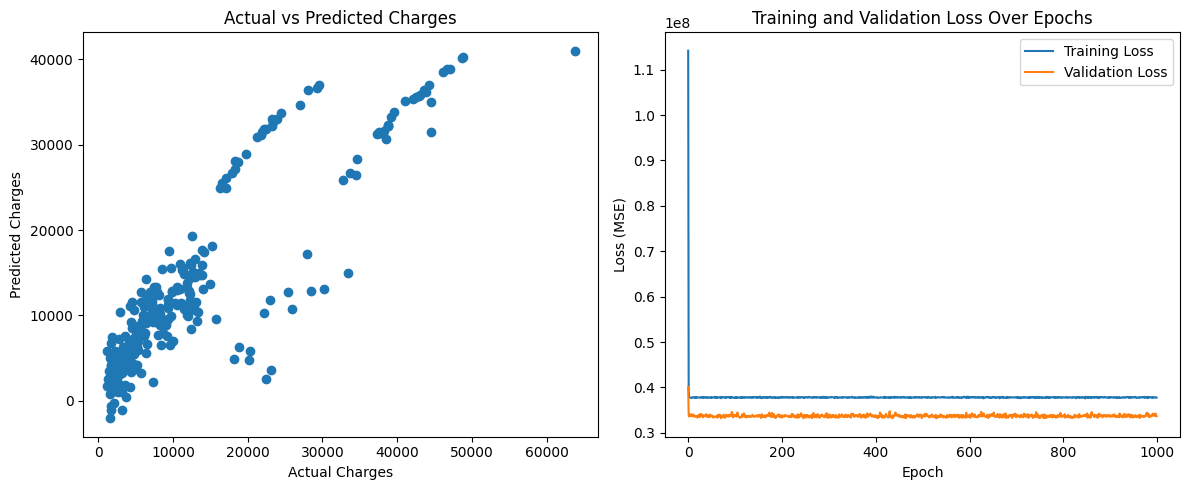

In [ ]:
# Plot the predicted vs actual values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')

# Plot the training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
data = pd.read_csv('car_price.csv')

In [5]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
data.rename(columns = {
    'car_ID': 'car_id',
    'symboling': 'safety_rating',
    'CarName': 'car_name',
    'fueltype': 'fuel_type',
    'aspiration': 'aspiration_type',
    'doornumber': 'door_number',
    'carbody': 'car_body_style',
    'drivewheel': 'drive_wheel_type',
    'enginelocation': 'engine_location',
    'wheelbase': 'wheel_base',
    'carlength': 'car_length',
    'carwidth': 'car_width',
    'carheight': 'car_height',
    'curbweight': 'curb_weight',
    'enginetype': 'engine_type',
    'cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size',
    'fuelsystem': 'fuel_system',
    'boreratio': 'bore_ratio',
    'stroke': 'stroke_length',
    'compressionratio': 'compression_ratio',
    'horsepower': 'horse_power',
    'peakrpm': 'peak_rpm',
    'citympg': 'city_mpg',
    'highwaympg': 'highway_mpg',
    'price': 'price'
}, inplace=True)

In [8]:
data = data[['safety_rating', 'fuel_type', 'aspiration_type', 'car_body_style', 'drive_wheel_type', 'engine_location', 'car_length',
      'car_width', 'curb_weight', 'cylinder_number', 'engine_size', 'bore_ratio', 'compression_ratio', 'horse_power', 'peak_rpm',
      'city_mpg', 'highway_mpg', 'price']].copy()

In [9]:
data.head()

,safety_rating,fuel_type,aspiration_type,car_body_style,drive_wheel_type,engine_location,car_length,car_width,curb_weight,cylinder_number,engine_size,bore_ratio,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,gas,std,convertible,rwd,front,168.8,64.1,2548,four,130,3.47,9.0,111,5000,21,27,13495.0
1,3,gas,std,convertible,rwd,front,168.8,64.1,2548,four,130,3.47,9.0,111,5000,21,27,16500.0
2,1,gas,std,hatchback,rwd,front,171.2,65.5,2823,six,152,2.68,9.0,154,5000,19,26,16500.0
3,2,gas,std,sedan,fwd,front,176.6,66.2,2337,four,109,3.19,10.0,102,5500,24,30,13950.0
4,2,gas,std,sedan,4wd,front,176.6,66.4,2824,five,136,3.19,8.0,115,5500,18,22,17450.0


In [10]:
data.dtypes

,0
safety_rating,int64
fuel_type,object
aspiration_type,object
car_body_style,object
drive_wheel_type,object
engine_location,object
car_length,float64
car_width,float64
curb_weight,int64
cylinder_number,object


In [11]:
data.duplicated().sum()

2

In [19]:
data = data[data.duplicated(keep='first') | ~data.duplicated(keep=False)]
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

,0
safety_rating,0
fuel_type,0
aspiration_type,0
car_body_style,0
drive_wheel_type,0
engine_location,0
car_length,0
car_width,0
curb_weight,0
cylinder_number,0


In [14]:
X = data.drop('price', axis=1)
y = data['price']

In [15]:
X

,safety_rating,fuel_type,aspiration_type,car_body_style,drive_wheel_type,engine_location,car_length,car_width,curb_weight,cylinder_number,engine_size,bore_ratio,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg
0,3,gas,std,convertible,rwd,front,168.8,64.1,2548,four,130,3.47,9.0,111,5000,21,27
1,3,gas,std,convertible,rwd,front,168.8,64.1,2548,four,130,3.47,9.0,111,5000,21,27
2,1,gas,std,hatchback,rwd,front,171.2,65.5,2823,six,152,2.68,9.0,154,5000,19,26
3,2,gas,std,sedan,fwd,front,176.6,66.2,2337,four,109,3.19,10.0,102,5500,24,30
4,2,gas,std,sedan,4wd,front,176.6,66.4,2824,five,136,3.19,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,sedan,rwd,front,188.8,68.9,2952,four,141,3.78,9.5,114,5400,23,28
201,-1,gas,turbo,sedan,rwd,front,188.8,68.8,3049,four,141,3.78,8.7,160,5300,19,25
202,-1,gas,std,sedan,rwd,front,188.8,68.9,3012,six,173,3.58,8.8,134,5500,18,23
203,-1,diesel,turbo,sedan,rwd,front,188.8,68.9,3217,six,145,3.01,23.0,106,4800,26,27


In [16]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [22]:
numeric_data = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_data

Index(['safety_rating', 'car_length', 'car_width', 'curb_weight',
       'engine_size', 'bore_ratio', 'compression_ratio', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

In [23]:
categorical_data = X_train.select_dtypes(include=['object']).columns
categorical_data

Index(['fuel_type', 'aspiration_type', 'car_body_style', 'drive_wheel_type',
       'engine_location', 'cylinder_number'],
      dtype='object')